In [2]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/santiago/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/santiago/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

(S
  (PERSON Mark/NNP)
  (ORGANIZATION Pedersen/NNP)
  and/CC
  (PERSON John/NNP Smith/NNP)
  are/VBP
  working/VBG
  at/IN
  (ORGANIZATION Googlesince/NNP)
  1994/CD
  for/IN
  $/$
  1000/CD
  per/IN
  week/NN
  the/DT
  (GSP US/NNP)
  army/NN
  (PERSON Jack/NNP White/NNP)
  guitar/NN)


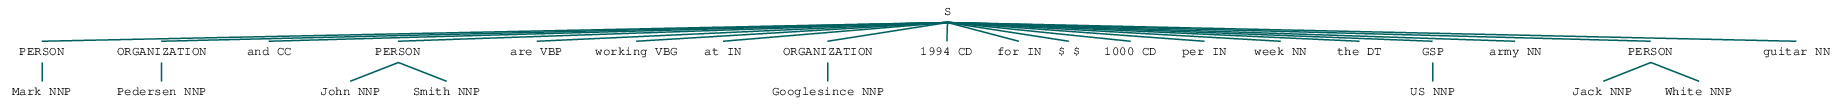

In [93]:
from nltk import word_tokenize, pos_tag, ne_chunk

sentence = "Mark Pedersen and John Smith are working at Google" + \
 "since 1994 for $1000 per week the US army Jack White guitar"
x = pos_tag(word_tokenize(sentence))
res = ne_chunk(x)
print(res)
res


In [84]:
res = ne_chunk(x, binary=True)
print(res)
print(isinstance(res[0],nltk.Tree))
res[0].leaves()
' '.join([r[0] for r in res[0].leaves()])

(S
  (NE Mark/NNP Pedersen/NNP)
  and/CC
  (NE John/NNP Smith/NNP)
  are/VBP
  working/VBG
  at/IN
  Googlesince/NNP
  1994/CD
  for/IN
  $/$
  1000/CD
  per/IN
  week/NN)
True


'Mark Pedersen'

In [90]:
from nltk import pos_tag
from nltk.wsd import lesk
from nltk.stem import WordNetLemmatizer
from nltk.metrics import jaccard_distance
from nltk.corpus import wordnet as wn

def lemmatize(p):
    if p[1][0] in {'N', 'V'}:
        return wnl.lemmatize(p[0].lower(), pos=p[1][0].lower())
    return p[0]

def penn2morphy(penntag, returnNone=False):
    morphy_tag = {'NN':wn.NOUN, 'JJ':wn.ADJ,
                  'VB':wn.VERB, 'RB':wn.ADV}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return None if returnNone else ''
    
def words_and_ne(nerc):
    if(isinstance(nerc,nltk.Tree)):
        return ' '.join([r[0] for r in nerc.leaves()])
    return nerc[0]
        
    
wnl = WordNetLemmatizer()

input_file = 'trial/STS.input.txt'
with open(input_file) as f:
    input_data = f.readlines()
    
document_distances = []
lesks_distances = []
morphology_distances = []
wordsne_distances = []
for i in input_data:
    sentences = nltk.sent_tokenize(i[4:])
    words = [nltk.word_tokenize(sent) for sent in sentences]
    pairs = [pos_tag(w) for w in words]
    l_words = [[lemmatize(p) for p in pair] for pair in pairs]
    res = [ne_chunk(p, binary=True) for p in pairs]
    wordsne = [[words_and_ne(r) for r in ress] for ress in res]
    synsets = [[[lesk(w, p[0], pos=penn2morphy(p[1][0])) for p in pair] for pair in pairs] for w in words]
    lesks_distances.append(jaccard_distance(set(synsets[0][0]), set(synsets[1][1])))
    morphology_distances.append(jaccard_distance(set(l_words[0]),set(l_words[1])))
    document_distances.append(jaccard_distance(set(words[0]),set(words[1])))
    wordsne_distances.append(jaccard_distance(set(wordsne[0]), set(wordsne[1])))
    
print("Lab2 distances: " + str(document_distances))
print("Lab3 distances: " + str(morphology_distances))
print("Lesk distance: " + str(lesks_distances))
print('Words and NE distance:' + str(wordsne_distances))

Lab2 distances: [0.6923076923076923, 0.7368421052631579, 0.6666666666666666, 0.5454545454545454, 0.7692307692307693, 0.8620689655172413]
Lab3 distances: [0.6923076923076923, 0.6666666666666666, 0.6666666666666666, 0.5454545454545454, 0.7692307692307693, 0.8620689655172413]
Lesk distance: [0.7, 0.7857142857142857, 0.5, 0.8888888888888888, 0.9, 0.92]
Words and NE distance:[0.6923076923076923, 0.7368421052631579, 0.6666666666666666, 0.5454545454545454, 0.7692307692307693, 0.8620689655172413]


In [92]:
from scipy.stats import pearsonr

gold_file = 'trial/STS.gs.txt'
with open(gold_file) as f:
    gold_data = f.readlines()
gold = [int(g[4:5]) for g in gold_data]

doc_pearson = pearsonr(document_distances, gold)[0]
mor_pearson = pearsonr(morphology_distances, gold)[0]
lesk_pearson = pearsonr(lesks_distances, gold)[0]
wordsne_pearson = pearsonr(wordsne_distances, gold)[0]

print('Lab2 pearson correlation: ' + str(doc_pearson))
print('Lab3 pearson correlation: ' + str(mor_pearson))
print('Lesk pearson correlation: ' + str(lesk_pearson))
print('Words and NE pearson correlation: ' + str(wordsne_pearson))


Lab2 pearson correlation: 0.4143770872333895
Lab3 pearson correlation: 0.517276212426234
Lesk pearson correlation: 0.6056964784272112
Words and NE pearson correlation: 0.4143770872333895


Using words and NE gives the same results as the previous case with words, this is because for this case, the sentences used from the trial set are not the best to test this kind of similiraty, since the output of using the resulting words and NE vector is the same as the previous words vector. This would be better for cases where more NE are present and have more significance in the texts like in cases like text search. NE could have an important impact over the similiraty of the search term and different texts, for example, searching for 'Jack White guitar' should look for the artist Jack White and his guitar, not a guy named Jack and a white guitar or similar other conjugations.